In [5]:
## EP1 - PSI3471
## Aluno: Leonardo Isao Komura - NUSP: 11261656

In [26]:
import cv2
import glob
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [7]:
def findCenterAndOrientation(img):
    m = cv2.moments(img)
    cen_x = m.m10/m.m00
    cen_y = m.m01/m.m00
    theta = 0.5 * math.atan2(2*m.mu11, m.mu20-m.mu02)
    return cen_x, cen_y, theta

In [30]:
def le(diretorio,nl,nc,inic,fim):
    nclasses=len(diretorio)
    n=nclasses*(fim-inic+1)
    AX=np.empty((n,nl,nc),np.uint8);
    AY=np.empty((n,),np.uint8);
 
    j=0; k=0
    for nome in diretorio:
        for i in range(inic,fim+1):
            st = nome + " (" + str(i) + ")."+"jpg"; st = nome+"/"+st; print(st)
            a=cv2.imread(st,cv2.IMREAD_GRAYSCALE)
            if a is None: print("Erro leitura",st); sys.exit()
            a=cv2.resize(a,(nl,nc),interpolation=cv2.INTER_AREA)
            AX[k,:,:]=a; AY[k]=j
            k+=1
            j+=1
    return AX,AY

In [40]:
diretorio=["Arborio","Basmati","Ipsala","Jasmine","Karacadag"]
nl = 125
nc = 125
AX,AY=le(diretorio,nl,nc,1,100)
qx,qy=le(diretorio,nl,nc,101,1000)

Arborio/Arborio (1).jpg
Arborio/Arborio (2).jpg
Arborio/Arborio (3).jpg
Arborio/Arborio (4).jpg
Arborio/Arborio (5).jpg
Arborio/Arborio (6).jpg
Arborio/Arborio (7).jpg
Arborio/Arborio (8).jpg
Arborio/Arborio (9).jpg
Arborio/Arborio (10).jpg
Arborio/Arborio (11).jpg
Arborio/Arborio (12).jpg
Arborio/Arborio (13).jpg
Arborio/Arborio (14).jpg
Arborio/Arborio (15).jpg
Arborio/Arborio (16).jpg
Arborio/Arborio (17).jpg
Arborio/Arborio (18).jpg
Arborio/Arborio (19).jpg
Arborio/Arborio (20).jpg
Arborio/Arborio (21).jpg
Arborio/Arborio (22).jpg
Arborio/Arborio (23).jpg
Arborio/Arborio (24).jpg
Arborio/Arborio (25).jpg
Arborio/Arborio (26).jpg
Arborio/Arborio (27).jpg
Arborio/Arborio (28).jpg
Arborio/Arborio (29).jpg
Arborio/Arborio (30).jpg
Arborio/Arborio (31).jpg
Arborio/Arborio (32).jpg
Arborio/Arborio (33).jpg
Arborio/Arborio (34).jpg
Arborio/Arborio (35).jpg
Arborio/Arborio (36).jpg
Arborio/Arborio (37).jpg
Arborio/Arborio (38).jpg
Arborio/Arborio (39).jpg
Arborio/Arborio (40).jpg
Arborio/A

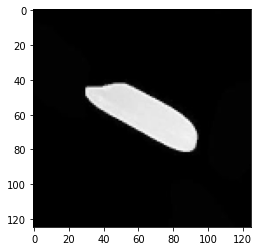

In [39]:
arborio = 0
basmati = 100
ipsala = 200
jasmine = 300
karacadag = 400

imgplot = plt.imshow(AX[jasmine+1], cmap='gray')
plt.show()

In [ ]:
for i in range(AX.shape[0]):
    x, y, theta = findCenterAndOrientation(AX[i])
    
    